## Functions

In [2]:
from sympy import symbols, solve, lambdify, exp, sqrt, log, Eq, sin, pi

The `sympy` unit system doesn't work very well in equations, so all equations are in pure SI (m, s, A).

In [3]:
c = 299792458 # units of m/s
q_e = 1.60218e-19 # units of C
amu = 1.66054e-27 # units of kg
e0 = 8.854188e-12 # units of F/m
m_calcium = 40.078*amu # Default ion

### Equations

$$l = \left[\frac{Z^2 q_e^2}{4 \pi \epsilon_0 M \nu^2}\right]^{\frac{1}{3}}$$

$$w=\frac{\lambda}{\pi NA}$$

$$d=\frac{2.018}{N^{0.559}}l$$

$$E = \sqrt{e^{-\frac{1}{2}\left(\frac{d}{w}\right)^2}}$$

$$F = 1-\sin^2\left(\frac{\pi}{2}E\right)$$

In [4]:
N, w, nu, F, M, Z = symbols('N w nu F M Z', positive=True)
l = ((Z**2*q_e**2)/(4*pi*e0*M*nu**2))**(1/3)
d = 2.018/N**0.559*l
#sigma = w/(2*sqrt(2*log(2)))
E = sqrt(exp(-1/2*((d/w)**2)))
fidelity_eq = Eq(F, 1-sin(pi/2*E)**2)

In [5]:
calcLengthScale = lambdify((nu, Z, M), l)

In [6]:
calcFidelity = lambdify((N, w, nu, Z, M), solve(fidelity_eq, F, rational=False)[0])

## Results

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


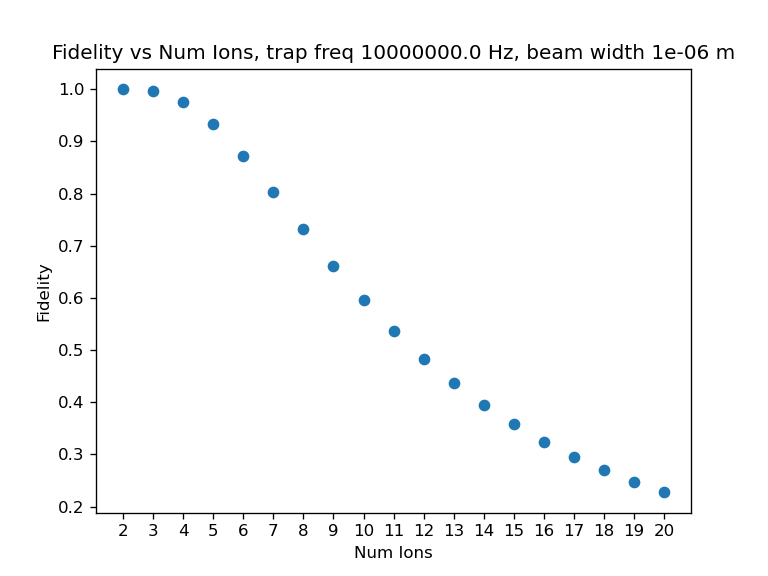

Text(0.5, 1.0, 'Fidelity vs Num Ions, trap freq 10000000.0 Hz, beam width 1e-06 m')

In [29]:
trapfreq = 10e6 # in Hz
beamwidth = 1e-6 # in m
ionnums = list(range(2,21))
fidelities = [calcFidelity(n, beamwidth, trapfreq, 1, m_calcium) for n in ionnums]
fig, ax = plt.subplots()
ax.scatter(ionnums, fidelities)
ax.set_xticks(np.arange(min(ionnums), max(ionnums)+1, 1.0))
ax.set_xlabel('Num Ions')
ax.set_ylabel('Fidelity')
ax.set_title(f'Fidelity vs Num Ions, trap freq {trapfreq} Hz, beam width {beamwidth} m')

In [30]:
trapfreq = 1e6 # in Hz
beamwidths = np.arange(1e-6, 10e-6, 1e-6)
ionnums = list(range(2,21))
fidelities = np.array([[float(calcFidelity(n, bw, trapfreq, 1, m_calcium)) for n in ionnums] for bw in beamwidths])

<IPython.core.display.Javascript object>


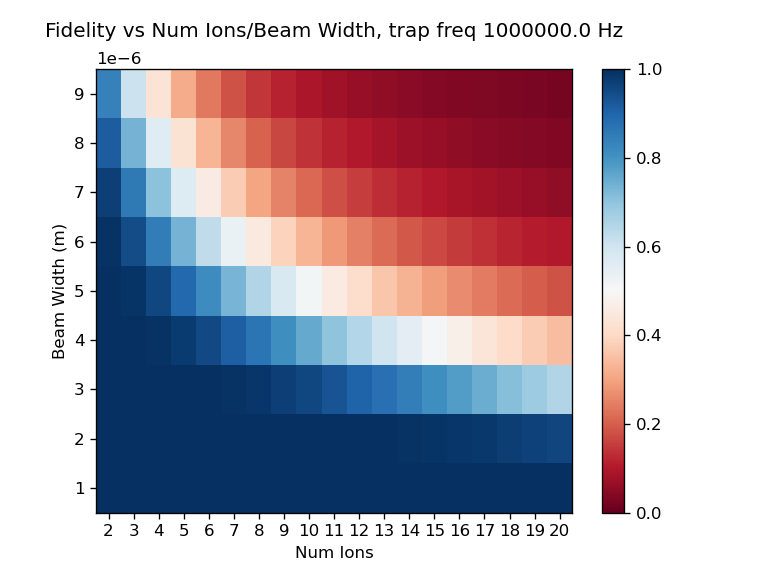

Text(0.5, 1.05, 'Fidelity vs Num Ions/Beam Width, trap freq 1000000.0 Hz')

In [31]:
fig, ax = plt.subplots()
c = ax.pcolormesh(ionnums, beamwidths, fidelities, cmap='RdBu', vmin=0.0, vmax=1.0)
ax.set_xticks(np.arange(min(ionnums), max(ionnums)+1, 1.0))
fig.colorbar(c, ax=ax)
ax.set_xlabel('Num Ions')
ax.set_ylabel('Beam Width (m)')
ax.set_title(f'Fidelity vs Num Ions/Beam Width, trap freq {trapfreq} Hz', y=1.05)

/tmp/ipykernel_747759/3629198645.py:7: RuntimeWarning: divide by zero encountered in log10
  log10f = np.log10(1-fidelities)


<IPython.core.display.Javascript object>


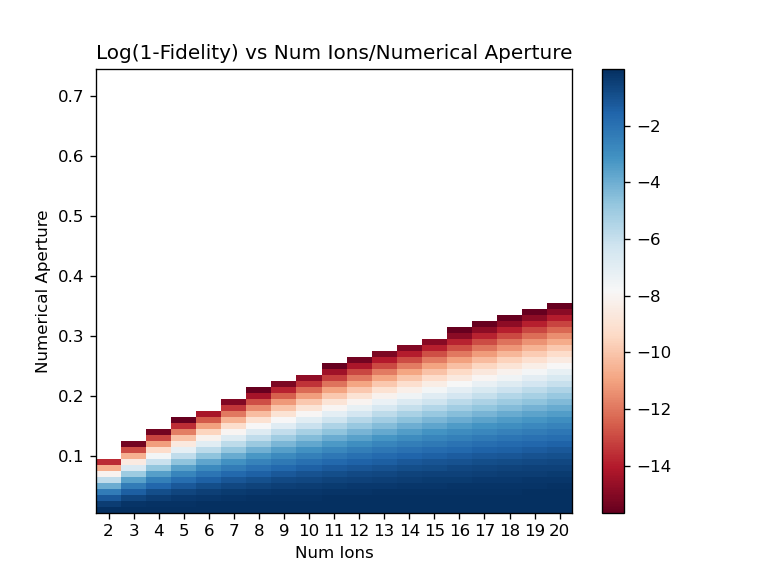

Text(0.5, 1.0, 'Log(1-Fidelity) vs Num Ions/Numerical Aperture')

In [42]:
trapfreq = 1e6 # in Hz
laserlen = 729e-9 # in m
NAs = np.arange(0.01, 0.75, 0.01)
beamwidths = laserlen/(np.pi*NAs)
ionnums = list(range(2,21))
fidelities = np.array([[float(calcFidelity(n, bw, trapfreq, 1, m_calcium)) for n in ionnums] for bw in beamwidths])
log10f = np.log10(1-fidelities)

fig, ax = plt.subplots()
c = ax.pcolormesh(ionnums, NAs, log10f, cmap='RdBu')
ax.set_xticks(np.arange(min(ionnums), max(ionnums)+1, 1.0))
fig.colorbar(c, ax=ax)
ax.set_xlabel('Num Ions')
ax.set_ylabel('Numerical Aperture')
ax.set_title(f'Log(1-Fidelity) vs Num Ions/Numerical Aperture')

<IPython.core.display.Javascript object>


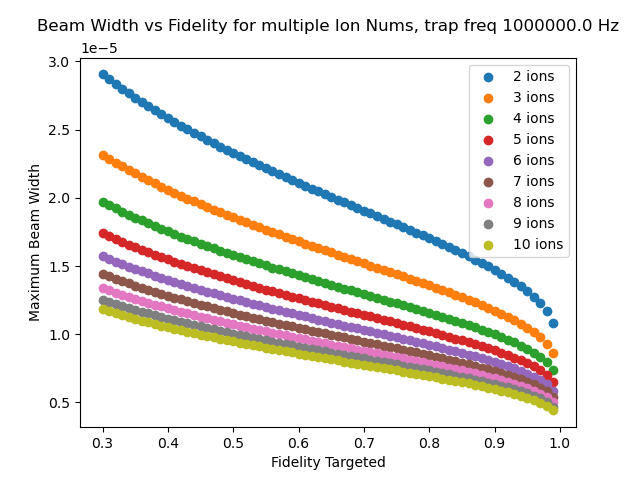

In [13]:
trapfreq = 1e6 # in Hz
ionnums = list(range(2,10+1))
fidelities = np.arange(0.3, 1.0, 0.01)
bws = [[calcBeamWidth(f, n, trapfreq, 1, m_calcium) for f in fidelities] for n in ionnums]
fig, ax = plt.subplots()
for n, bw_vals in zip(ionnums, bws):
    ax.scatter(fidelities, bw_vals, label=f'{n} ions')
ax.set_xlabel('Fidelity Targeted')
ax.set_ylabel('Maximum Beam Width')
ax.set_title(f'Beam Width vs Fidelity for multiple Ion Nums, trap freq {trapfreq} Hz', y=1.05)
ax.legend()